In [404]:
#importation des bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import yfinance as yf
from scipy.stats import norm

In [405]:
#ajustar tiempo
year= 15
endDate= dt.datetime.now()
print(endDate)
starDate= endDate - dt.timedelta(days=year*365)
print(starDate)



2024-09-11 20:53:54.029747
2009-09-15 20:53:54.029747


In [406]:
#crear los Tickers
tickers= ['SPY','BND','GDL','QQQ','VTI']



In [407]:

#descargar los precios ajustados
adj_close_df=pd.DataFrame()

for ticker in tickers:
    data=yf.download(ticker, start=starDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   SPY        BND       GDL         QQQ         VTI
Date                                                               
2009-09-16   81.163651  51.415565  5.131358   37.066452   41.379059
2009-09-17   81.042633  51.565292  5.184113   37.057709   41.303101
2009-09-18   81.094322  51.506668  5.187632   37.119827   41.363884
2009-09-21   80.889145  51.467628  5.226317   37.233517   41.249905
2009-09-22   81.360268  51.402481  5.173563   37.303486   41.493046
...                ...        ...       ...         ...         ...
2024-09-05  549.609985  74.959999  8.070000  461.040009  270.940002
2024-09-06  540.359985  75.050003  8.080000  448.690002  266.440002
2024-09-09  546.409973  75.150002  8.080000  454.459991  269.290009
2024-09-10  548.789978  75.400002  8.070000  458.660004  270.339996
2024-09-11  554.419983  75.360001  8.070000  468.619995  273.029999

[3772 rows x 5 columns]


In [408]:
#calcular los retornos diarios
log_ret=np.log(adj_close_df/adj_close_df.shift(1))
log_ret=log_ret.dropna()
print(log_ret)

                 SPY       BND       GDL       QQQ       VTI
Date                                                        
2009-09-17 -0.001492  0.002908  0.010228 -0.000236 -0.001837
2009-09-18  0.000638 -0.001138  0.000678  0.001675  0.001471
2009-09-21 -0.002533 -0.000758  0.007430  0.003058 -0.002759
2009-09-22  0.005807 -0.001267 -0.010145  0.001877  0.005877
2009-09-23 -0.008347  0.002910  0.008124 -0.004700 -0.010308
...              ...       ...       ...       ...       ...
2024-09-05 -0.002435  0.002404 -0.001238  0.000933 -0.003096
2024-09-06 -0.016973  0.001200  0.001238 -0.027153 -0.016748
2024-09-09  0.011134  0.001332  0.000000  0.012778  0.010640
2024-09-10  0.004346  0.003321 -0.001238  0.009199  0.003892
2024-09-11  0.010207 -0.000531  0.000000  0.021483  0.009901

[3771 rows x 5 columns]


In [409]:
#calcular la rentabilidad
def expected_return(weights, log_ret):
    return np.sum(weights * log_ret.mean()) 

In [410]:
#
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [411]:
#crear la covarianza
cov_matrix=log_ret.cov()
print(cov_matrix)

              SPY           BND       GDL           QQQ           VTI
SPY  1.169240e-04 -3.622275e-08  0.000039  1.294780e-04  1.193734e-04
BND -3.622275e-08  9.229315e-06  0.000003  8.287891e-07  1.460621e-07
GDL  3.867193e-05  3.281079e-06  0.000060  3.899737e-05  4.062423e-05
QQQ  1.294780e-04  8.287891e-07  0.000039  1.663797e-04  1.322579e-04
VTI  1.193734e-04  1.460621e-07  0.000041  1.322579e-04  1.228556e-04


In [412]:
#calculra la rentabilidad esperada y la desviacion estandar
portfolio_values=1000000
weights=np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return=expected_return(weights, log_ret)
portfolio_std_dev=standard_deviation(weights, cov_matrix)

In [413]:
#definicion del proceso del metodo de montecarlo

def random_z_score():
    return np.random.normal(0,1)

In [414]:
#crear el scaner de perdidas

days= 20
def scenario_gain_loss(portfolio_values,portfolio_std_dev,z_score):
    return portfolio_values*portfolio_expected_return*days + portfolio_values*portfolio_std_dev*np.sqrt(days)*z_score

In [415]:
#simulacion
simulations = 10000 
scenarioReturn=[]

for i in range(simulations):
    z_score=random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_values,portfolio_std_dev,z_score))

In [416]:
#calculo de riesgo
confidence_interval=0.95
VaR= -np.percentile(scenarioReturn, 100*(1-confidence_interval))
print(VaR)

48375.30312978413


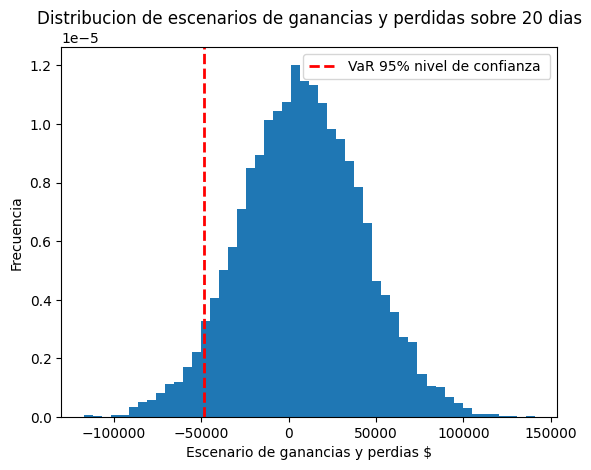

In [417]:
#plt de distribucion
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Escenario de ganancias y perdias $')
plt.ylabel('Frecuencia')
plt.title(f'Distribucion de escenarios de ganancias y perdidas sobre {days} dias') 
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2,label=f'VaR {confidence_interval:.0%} nivel de confianza ')
plt.legend()          